In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

###### >> House-pricing

In [4]:
HPDF = pd.read_csv('HousePrices_HalfMil.csv')

In [5]:
HPDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
Area             500000 non-null int64
Garage           500000 non-null int64
FirePlace        500000 non-null int64
Baths            500000 non-null int64
White Marble     500000 non-null int64
Black Marble     500000 non-null int64
Indian Marble    500000 non-null int64
Floors           500000 non-null int64
City             500000 non-null int64
Solar            500000 non-null int64
Electric         500000 non-null int64
Fiber            500000 non-null int64
Glass Doors      500000 non-null int64
Swiming Pool     500000 non-null int64
Garden           500000 non-null int64
Prices           500000 non-null int64
dtypes: int64(16)
memory usage: 61.0 MB


In [6]:
HPDF.shape

(500000, 16)

In [15]:
HPDF.describe(include= 'all',percentiles=[0.20,0.30])

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
20%,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,31450.000000
30%,75.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,35325.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


In [16]:
HPDF.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


* scatter plot "Area" vs "Prices"

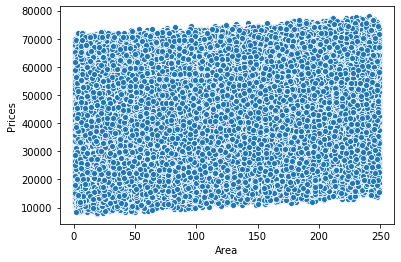

In [23]:
# plt.figure(figsize=(16,9))
sns.scatterplot(HPDF['Area'],HPDF['Prices'])

* Box plot "Area" vs "Prices"

Text(0.5, 1.0, 'BOXPLOT of Area vs Prices')

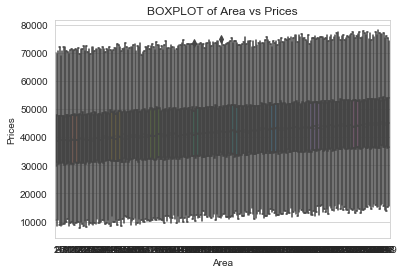

In [28]:
sns.set_style('whitegrid')
sns.boxplot(x='Area',y='Prices',data=HPDF)
plt.title('BOXPLOT of Area vs Prices')

In [27]:
# sns.scatterplot(HPDF['Garage'],HPDF['Prices'])
#  Scatter plot of Garage and prices isn't effective to understand the data

> Linear Regression

In [30]:
lin_mod = LinearRegression()

In [31]:
xt,XT,yt,YT = train_test_split(HPDF.iloc[:,:-1],HPDF.iloc[:,-1],test_size = 0.3)

In [32]:
lin_mod.fit(xt,yt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
YTP = lin_mod.predict(XT)

In [39]:
MSE = mean_squared_error(YT,YTP)
MSE

1.443361904446348e-21

* Here the Mean squared error is minimum Compared to different features and Whole features together.
* So Selecting All features to train the model